<a href="https://colab.research.google.com/github/Siddha-Regilla/Data-Science-Classroom-notebooks/blob/main/09.%20KMeans_clustering_29_02_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Library
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# We are using random data to understand the KMeans function
X = np.random.uniform(0,1,1000) # this creates random numbers, and uniform helps create 1000 random numbers between 0 - 1
Y = np.random.uniform(0,1,1000)
X

array([5.84535152e-01, 2.66744956e-01, 6.50958808e-01, 8.92754570e-01,
       1.78513066e-01, 4.06951004e-01, 6.94682596e-01, 9.72333429e-01,
       6.59350540e-01, 2.57585390e-03, 4.06963400e-01, 7.06934199e-01,
       2.87660370e-01, 5.64257850e-01, 7.40247779e-01, 3.06718491e-01,
       1.20228415e-01, 7.95640788e-01, 9.06359450e-01, 3.32977966e-01,
       6.58733345e-01, 1.13053549e-01, 6.27062938e-01, 8.22372642e-01,
       8.08929671e-01, 5.21472840e-01, 5.41790182e-01, 4.05326699e-01,
       8.79349509e-01, 9.08292089e-01, 3.20928287e-01, 5.13075372e-01,
       4.55901990e-01, 3.56160001e-01, 3.60969871e-01, 8.67754542e-01,
       2.98225720e-01, 4.60890111e-02, 4.82548325e-01, 8.57163331e-01,
       7.86195444e-01, 9.86787347e-01, 7.97642001e-01, 2.22208202e-01,
       7.37293823e-01, 7.57635260e-01, 5.59282578e-01, 1.73073607e-02,
       9.20112898e-01, 6.13685546e-01, 6.02632922e-01, 6.37534958e-01,
       9.52338492e-02, 3.92243674e-01, 1.73430797e-01, 7.55463170e-01,
      

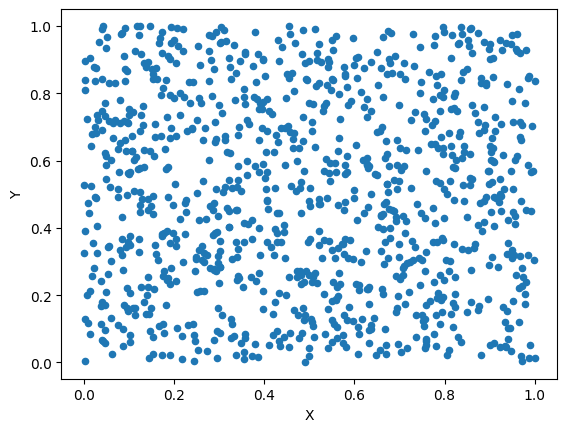

In [3]:
# We are putting the above created random numbers into a dataframe
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy
df_xy.X = X # assigning x values to x column
df_xy.Y = Y # assigning y values to y column
df_xy
df_xy.plot(x="X",y = "Y",kind="scatter") # Plotting a scatter plot on the the above created dataframe
model1 = KMeans(n_clusters=5).fit(df_xy) # we are creating a model with 5 clusters



<Axes: xlabel='X', ylabel='Y'>

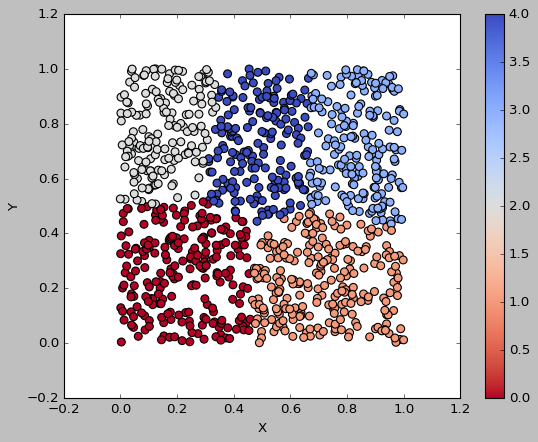

In [19]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r) # plotting a scatter plot on the dataframe based on the clusters created by the model
# the data is coloured based on the cluster and the .coolwarm_r means that it would start with red or the warm side and colour towards cool
# where as if it was just coolwarm_ then the default is cool to warm

In [5]:
# Upload dataset - Universities_Clustering.csv
# reading a csv file using pandas library
Univ = pd.read_csv("Universities_Clustering (1).csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [6]:
# Defining a function to normalize the values of the column
# There is an in built function in python - from sklearn.preprocessing import minmaxscaler - this code is also written below
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [7]:
# Here we input all the columns except the first one and it doesn't help us with the predictions and cant be normalised
df_norm = norm_func(Univ.iloc[:,1:])  #iloc is used to help select the required rows or columns. Here we have selected columns from the 1st index

In [8]:
df_norm.head(10)  # Top 10 rows


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


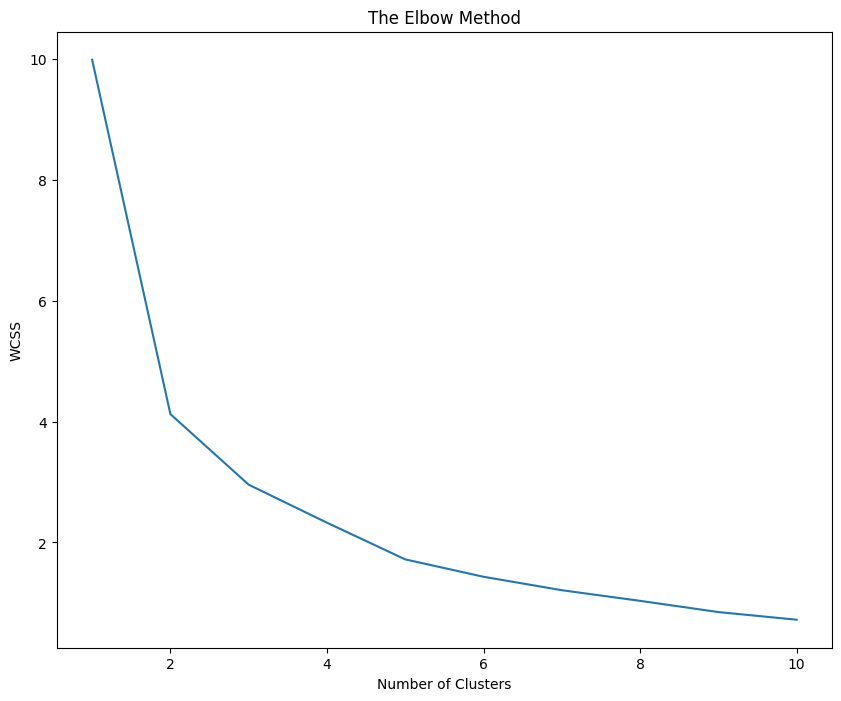

In [9]:
# Finding the K values on the noralised data
# To identify the K value, we plot the elbow curve
fig = plt.figure(figsize=(10, 8)) # We are defining the figure size
WCSS = [] # Here we are creating an empty list to which we will be adding within cluster sum of squares (WCSS)
for i in range(1, 11): # We start with i vlaue as 1 uptil i = 10
    clf = KMeans(n_clusters=i) # We define k value  for every i value, i.e., no. of cluster
    clf.fit(df_norm) # and then fit the cluster on the normalised data
    WCSS.append(clf.inertia_) # inertia is another name for WCSS, and the value is stored/added into the list
plt.plot(range(1, 11), WCSS) # then we plot the k values on x axis and wcss on the y axis
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [50]:
# Consdering k = 5, we build our kmeans clustering model
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)  # Predicting the cluster numbers on the normalised data

In [51]:
# All the universities have been assigned to a cluster
y_kmeans
#clf.cluster_centers_
clf.labels_

array([0, 2, 3, 0, 0, 4, 4, 0, 4, 2, 4, 0, 0, 1, 4, 1, 4, 1, 3, 0, 3, 0,
       0, 1, 4], dtype=int32)

In [52]:
y_kmeans

array([0, 2, 3, 0, 0, 4, 4, 0, 4, 2, 4, 0, 0, 1, 4, 1, 4, 1, 3, 0, 3, 0,
       0, 1, 4], dtype=int32)

In [53]:
# the code help us find out the cluster centers distances, the first list if for 0th index cluster, 2nd list is for 1st index cluster and so on till 4th index cluster
# We have 6 values per cluster for every column
clf.cluster_centers_

array([[0.65718157, 0.72222222, 0.2748538 , 0.33918129, 0.28414929,
        0.78888889],
       [0.13780488, 0.14930556, 0.73684211, 0.69736842, 0.02276248,
        0.15833333],
       [0.86585366, 0.82638889, 0.26973684, 0.02631579, 0.95549562,
        0.56666667],
       [0.54065041, 0.63888889, 0.54824561, 0.42105263, 0.179354  ,
        0.37777778],
       [0.87456446, 0.88095238, 0.09774436, 0.2406015 , 0.48789238,
        0.91904762]])

In [54]:
# it gives us WCSS distance when k = 5
clf.inertia_

1.6781326840746353

In [55]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object
Univ['clust']=md # creating a  new column and assigning it to new column
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,3
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,4
6,Duke,1315,90,30,12,31585,95,4
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,4
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [56]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1274.444444,80.000000,34.888889,12.444444,24295.555556,90.666667
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
3,1226.666667,74.000000,55.666667,14.000000,18545.333333,78.333333
4,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429


In [57]:
plt.style.use(['classic'])
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Clusters using KMeans')

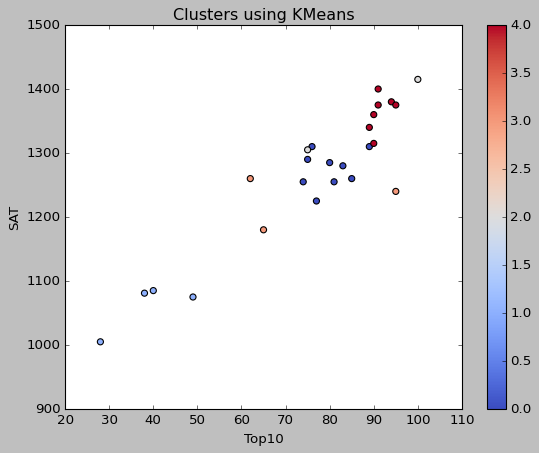

In [58]:
# Plotting the clusters
Univ.plot(x="Top10",y ="SAT",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans')

In [40]:
# in the above visualization, we can see that the cluster is not completely homogenous. We can then try out the different k- values to see which is the best suited.
# Even after trying all the best possible values, there maybe some missclassification, this is due to the outliers and they need to be handled accordingly.

In [21]:
WCSS

[9.98823519663856,
 4.12345244239718,
 2.955684328573544,
 2.3266557712956173,
 1.7196037808194464,
 1.4320118047058645,
 1.2096210020429905,
 1.0335413054778821,
 0.8478221520781075,
 0.7212370830526206]